BELAJAR K-Means Clustering

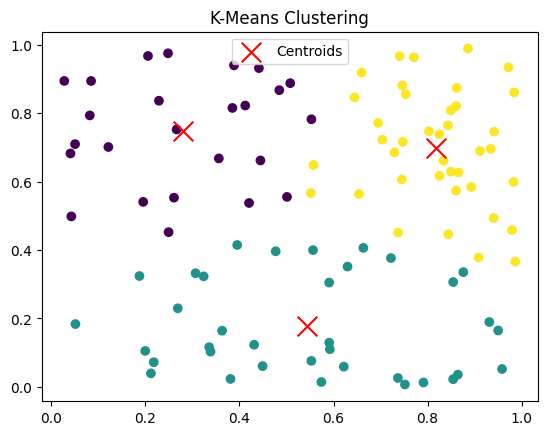

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Contoh data 2D
X = np.random.rand(100, 2)  # 100 titik acak dalam 2 dimensi

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Melatih model
kmeans.fit(X)

# Mendapatkan label untuk setiap data poin
labels = kmeans.labels_

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


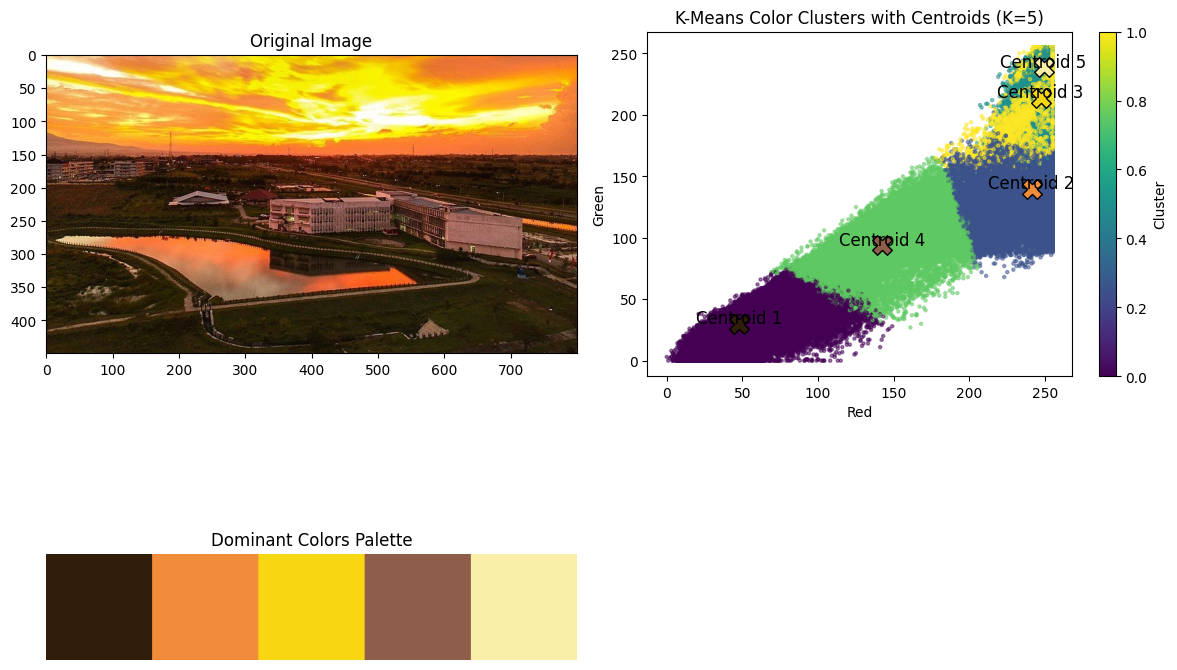

Dominant Colors:
Color 1: RGB(48, 30, 11)
Color 2: RGB(241, 140, 59)
Color 3: RGB(247, 214, 18)
Color 4: RGB(142, 94, 75)
Color 5: RGB(249, 239, 169)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

# Fungsi untuk memuat gambar dan mengubahnya menjadi format RGB
def load_image(image_path):
    img = mpimg.imread(image_path)
    # Jika gambar dalam format RGBA (misal PNG), kita hanya mengambil RGB
    if img.shape[2] == 4:
        img = img[:, :, :3]
    return img

# Fungsi untuk melakukan K-Means Clustering pada gambar RGB
def kmeans_color_clustering(image_path, n_clusters=5):
    # Muat gambar
    img = load_image(image_path)

    # Ubah gambar ke bentuk array 2D
    pixels = img.reshape(-1, 3)

    # Lakukan KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)

    # Ambil hasil cluster (warna dominan)
    centers = kmeans.cluster_centers_

    # Ambil label untuk setiap pixel
    labels = kmeans.labels_

    # Menampilkan gambar asli, cluster, dan warna dominan
    plt.figure(figsize=(12, 8))

    # Gambar asli
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    # Menampilkan warna dominan dalam bentuk grafik dengan centroid
    plt.subplot(2, 2, 2)
    plt.scatter(pixels[:, 0], pixels[:, 1], c=kmeans.labels_, s=5, alpha=0.5, cmap='viridis')

    # Menambahkan centroid warna dominan
    for i, center in enumerate(centers.astype(int)):
        plt.scatter(center[0], center[1], color=[center / 255], s=200, edgecolor='black', marker='X')
        plt.text(center[0], center[1], f"Centroid {i+1}", color='black', fontsize=12, ha='center')

    plt.title(f'K-Means Color Clusters with Centroids (K={n_clusters})')
    plt.xlabel('Red')
    plt.ylabel('Green')
    plt.colorbar(label='Cluster')

    # Visualisasi Panel Warna Dominan
    plt.subplot(2, 2, 3)
    # Ubah ukuran panel warna dominan agar lebih lebar (misalnya 100x300)
    color_palette = np.zeros((100, n_clusters * 100, 3), dtype=int)

    # Mengisi panel dengan warna centroid
    for i, center in enumerate(centers.astype(int)):
        color_palette[:, i * 100:(i + 1) * 100, :] = center

    plt.imshow(color_palette)
    plt.axis('off')
    plt.title('Dominant Colors Palette')

    plt.tight_layout()
    plt.show()

    return centers.astype(int), labels

# Path ke gambar yang ingin dianalisis
image_path = 'background.jpg'  # Ganti dengan path gambar Anda

# Jalankan fungsi dengan 5 cluster warna
dominant_colors, labels = kmeans_color_clustering(image_path, n_clusters=5)

# Menampilkan warna dominan
print("Dominant Colors:")
for i, color in enumerate(dominant_colors):
    print(f"Color {i+1}: RGB{tuple(color)}")


In [ ]:
import pandas as pd

df = pd.read_csv('marketing_campaign_dataset.csv')

# Daftar nama kolom yang disebutkan
columns = [
    "Campaign_ID", "Company", "Campaign_Type", "Target_Audience", "Duration",
    "Channel_Used", "Conversion_Rate", "Acquisition_Cost", "ROI", "Location",
    "Language", "Clicks", "Impressions", "Engagement_Score", "Customer_Segment", "Date"
]

# Menyimpan hasil dalam list untuk setiap kolom
result = []

# Mengambil nilai unik dan frekuensinya
for column in columns:
    value_counts = df[column].value_counts()
    temp_df = pd.DataFrame({
        'Value': value_counts.index,
        'Frequency': value_counts.values
    })
    result.append(temp_df)

# Menampilkan hasil dalam bentuk tabel
for i, column in enumerate(columns):
    print(f"Frekuensi nilai dalam kolom {column}:")
    display(result[i])  # Jika kamu menggunakan Jupyter atau IPython
    print("-" * 50)

Frekuensi nilai dalam kolom Campaign_ID:


,Value,Frequency
0,1,1
1,133351,1
2,133329,1
3,133330,1
4,133331,1
...,...,...
199995,66669,1
199996,66670,1
199997,66671,1
199998,66672,1


--------------------------------------------------
Frekuensi nilai dalam kolom Company:


,Value,Frequency
0,TechCorp,40237
1,Alpha Innovations,40051
2,DataTech Solutions,40012
3,NexGen Systems,39991
4,Innovate Industries,39709


--------------------------------------------------
Frekuensi nilai dalam kolom Campaign_Type:


,Value,Frequency
0,Influencer,40169
1,Search,40157
2,Display,39987
3,Email,39870
4,Social Media,39817


--------------------------------------------------
Frekuensi nilai dalam kolom Target_Audience:


,Value,Frequency
0,Men 18-24,40258
1,Men 25-34,40023
2,All Ages,40019
3,Women 25-34,40013
4,Women 35-44,39687


--------------------------------------------------
Frekuensi nilai dalam kolom Duration:


,Value,Frequency
0,30 days,50255
1,45 days,50100
2,60 days,49866
3,15 days,49779


--------------------------------------------------
Frekuensi nilai dalam kolom Channel_Used:


,Value,Frequency
0,Email,33599
1,Google Ads,33438
2,YouTube,33392
3,Instagram,33392
4,Website,33360
5,Facebook,32819


--------------------------------------------------
Frekuensi nilai dalam kolom Conversion_Rate:


,Value,Frequency
0,0.13,14468
1,0.10,14437
2,0.06,14402
3,0.11,14399
4,0.02,14386
5,0.04,14339
6,0.09,14318
7,0.12,14263
8,0.08,14251
9,0.03,14225


--------------------------------------------------
Frekuensi nilai dalam kolom Acquisition_Cost:


,Value,Frequency
0,"$16,578.00",32
1,"$6,570.00",31
2,"$9,128.00",30
3,"$8,503.00",29
4,"$15,430.00",29
...,...,...
14996,"$6,147.00",3
14997,"$7,443.00",3
14998,"$12,545.00",3
14999,"$14,068.00",2


--------------------------------------------------
Frekuensi nilai dalam kolom ROI:


,Value,Frequency
0,7.43,407
1,4.25,383
2,6.05,378
3,5.89,375
4,7.69,374
...,...,...
596,6.38,282
597,7.09,280
598,6.99,274
599,2.00,178


--------------------------------------------------
Frekuensi nilai dalam kolom Location:


,Value,Frequency
0,Miami,40269
1,New York,40024
2,Chicago,40010
3,Los Angeles,39947
4,Houston,39750


--------------------------------------------------
Frekuensi nilai dalam kolom Language:


,Value,Frequency
0,Mandarin,40255
1,Spanish,40102
2,German,39983
3,English,39896
4,French,39764


--------------------------------------------------
Frekuensi nilai dalam kolom Clicks:


,Value,Frequency
0,477,273
1,140,266
2,262,266
3,726,266
4,232,262
...,...,...
896,896,187
897,302,186
898,427,185
899,549,182


--------------------------------------------------
Frekuensi nilai dalam kolom Impressions:


,Value,Frequency
0,3564,41
1,9471,41
2,1602,41
3,3872,40
4,5694,40
...,...,...
8996,8303,8
8997,1753,8
8998,6079,8
8999,6103,7


--------------------------------------------------
Frekuensi nilai dalam kolom Engagement_Score:


,Value,Frequency
0,4,20141
1,2,20113
2,9,20106
3,1,20027
4,5,20023
5,3,19947
6,8,19944
7,7,19933
8,10,19884
9,6,19882


--------------------------------------------------
Frekuensi nilai dalam kolom Customer_Segment:


,Value,Frequency
0,Foodies,40208
1,Tech Enthusiasts,40151
2,Outdoor Adventurers,40011
3,Health & Wellness,39888
4,Fashionistas,39742


--------------------------------------------------
Frekuensi nilai dalam kolom Date:


,Value,Frequency
0,2021-01-01,548
1,2021-08-16,548
2,2021-08-24,548
3,2021-08-23,548
4,2021-08-22,548
...,...,...
360,2021-12-16,547
361,2021-12-15,547
362,2021-12-14,547
363,2021-12-13,547


--------------------------------------------------


Apakah dataset ada nilai yang null?
Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

Setelah menghapus missing values:
Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64
Evaluasi Davies-Bouldin Index: 2.1847222874617844


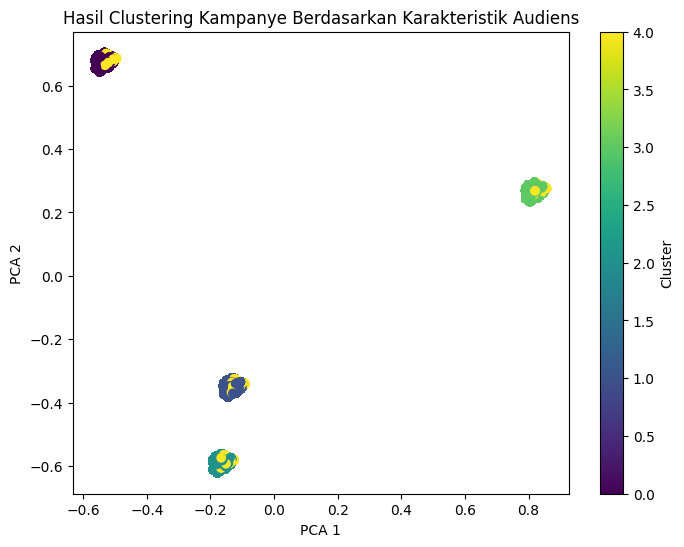

Jumlah data per cluster:
Cluster
0    40069
1    39742
2    39952
3    40068
4    40169
Name: count, dtype: int64

Rangkuman nilai terbanyak (modus) dari setiap cluster:

Cluster 0:
Jumlah Data: 40069
Nilai Terbanyak (Modus) untuk Setiap Kolom:
Campaign_Type         Search
Target_Audience    Men 18-24
Duration             45 days
Channel_Used         YouTube
Cluster                    0
Name: 0, dtype: object

Cluster 1:
Jumlah Data: 39742
Nilai Terbanyak (Modus) untuk Setiap Kolom:
Campaign_Type       Display
Target_Audience    All Ages
Duration            15 days
Channel_Used          Email
Cluster                   1
Name: 0, dtype: object

Cluster 2:
Jumlah Data: 39952
Nilai Terbanyak (Modus) untuk Setiap Kolom:
Campaign_Type           Search
Target_Audience    Women 35-44
Duration               60 days
Channel_Used           YouTube
Cluster                      2
Name: 0, dtype: object

Cluster 3:
Jumlah Data: 40068
Nilai Terbanyak (Modus) untuk Setiap Kolom:
Campaign_Type        

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# --- 1. Data Preprocessing ---
# Inisialisasi Dataset
df = pd.read_csv('marketing_campaign_dataset.csv')

# Menampilkan apakah terdapat missing values dalam dataset
print("Apakah dataset ada nilai yang null?")
print(f"{df.isnull().sum()}")

# Menghapus baris dengan missing values
df_cleaned = df.dropna()

# Menampilkan apakah ada nilai yang null setelah pembersihan
print("\nSetelah menghapus missing values:")
print(f"{df_cleaned.isnull().sum()}")

# Pilih kolom yang relevan untuk analisis clustering
columns_to_use = ['Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used']
df_selected = df_cleaned[columns_to_use].copy()

# Melakukan One-Hot Encoding untuk data kategorikal
df_encoded = pd.get_dummies(df_selected)

# Menggunakan PCA untuk mengurangi dimensi data menjadi 2 komponen utama agar dapat divisualisasikan
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_encoded)

# --- 2. Building the K-means Model ---
# Tentukan jumlah cluster
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Latih model K-means menggunakan data yang sudah di-encode
kmeans.fit(df_encoded)

# Tambahkan hasil cluster ke dataframe
df_selected['Cluster'] = kmeans.labels_

# --- 3. Evaluating the Clustering Model ---
# Evaluasi model menggunakan Davies-Bouldin Index
db_score = davies_bouldin_score(df_encoded, kmeans.labels_)
print(f'Evaluasi Davies-Bouldin Index: {db_score}')

# --- 4. Visualizing the Results ---
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Hasil Clustering Kampanye Berdasarkan Karakteristik Audiens')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Rangkuman jumlah data per cluster
print("Jumlah data per cluster:")
cluster_counts = df_selected['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Menampilkan ringkasan nilai terbanyak (modus) dari setiap cluster
print("\nRangkuman nilai terbanyak (modus) dari setiap cluster:")
for cluster_id in sorted(df_selected['Cluster'].unique()):
    cluster_data = df_selected[df_selected['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print("Jumlah Data:", len(cluster_data))
    print("Nilai Terbanyak (Modus) untuk Setiap Kolom:")
    print(cluster_data.mode().iloc[0])  # Menampilkan modus dari setiap kolom